# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

### DATASET : 1

In [3]:
ls

C:/                                 final_dataset.csv
Final-dissertation.docx             model_diagram
Sagrika Disseration Notebook.ipynb  twitter api.ipynb
ecological dataset.csv              ~$nal-dissertation.docx


In [3]:
# Reading the first dataset file genereated using the Twitter API
twitter_df= pd.read_csv("ecological dataset.csv")

In [5]:
twitter_df

,index,text,label,target
0,0,"CFS sounds alarm on climate change, disaster r...",on-topic,1
1,1,Martin Rowson on the climate crisis ‘final war...,on-topic,1
2,2,@backtolife_2023 Lies all lies no climate chan...,on-topic,1
3,3,UN scientists warn of climate disaster unless ...,on-topic,1
4,4,Since the occurrences of natural disasters hav...,on-topic,1
...,...,...,...,...
715,715,"Franz Josef Strauss , the great visionary saw ...",on-topic,1
716,716,Since the occurrences of natural disasters hav...,on-topic,1
717,717,Bihar’s Disaster Management Minister Shahnawaz...,on-topic,1
718,718,It's not popular to acknowledge that settlers ...,on-topic,1


In [4]:
# Renaming the text column to tweet
twitter_df.rename(columns={'text': 'tweet'},inplace=True)

In [7]:
twitter_df.head()

,index,tweet,label,target
0,0,"CFS sounds alarm on climate change, disaster r...",on-topic,1
1,1,Martin Rowson on the climate crisis ‘final war...,on-topic,1
2,2,@backtolife_2023 Lies all lies no climate chan...,on-topic,1
3,3,UN scientists warn of climate disaster unless ...,on-topic,1
4,4,Since the occurrences of natural disasters hav...,on-topic,1


### DATASET : 2

In [5]:
# Reading the second dataset https://crisisnlp.qcri.org/ 
crisis_df= pd.read_csv("final_dataset.csv")

In [9]:
crisis_df.head()

,index,tweet id,tweet,label
0,5191,'337471889591115777',RT @SpeakerBoehner: Our hearts are with the pe...,on-topic
1,395,'296247225212887040',Someone stole Scholes' car and someone else pi...,off-topic
2,8481,'325319587908423680',Timeline: The manhunt for Boston bombing suspe...,on-topic
3,5306,'263338766809317376',Hurricane sandy messd it up i kno they wanted ...,on-topic
4,599,'263082124146515968',The way my lil brother just screamed Cus he wa...,on-topic


In [10]:
crisis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40045 entries, 0 to 40044
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     40045 non-null  int64 
 1   tweet id  40045 non-null  object
 2    tweet    40045 non-null  object
 3    label    40045 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [11]:
# Print the column names
print(crisis_df.columns)

Index(['index', 'tweet id', ' tweet', ' label'], dtype='object')


In [6]:
# Dropping thje tweet_id column because it contributes nothing to the target variable

column_to_drop = "tweet id"

# Drop the specified column
crisis_df.drop(column_to_drop, axis=1,inplace=True)

crisis_df.head()

,index,tweet,label
0,5191,RT @SpeakerBoehner: Our hearts are with the pe...,on-topic
1,395,Someone stole Scholes' car and someone else pi...,off-topic
2,8481,Timeline: The manhunt for Boston bombing suspe...,on-topic
3,5306,Hurricane sandy messd it up i kno they wanted ...,on-topic
4,599,The way my lil brother just screamed Cus he wa...,on-topic


In [7]:
# Forming our target values where 1 represents the on-topic(disaster related) while 0 represents off-topic(non-disaster)
crisis_df['target'] = crisis_df[' label'].replace({'on-topic': 1, 'off-topic': 0})
crisis_df.head()

,index,tweet,label,target
0,5191,RT @SpeakerBoehner: Our hearts are with the pe...,on-topic,1
1,395,Someone stole Scholes' car and someone else pi...,off-topic,0
2,8481,Timeline: The manhunt for Boston bombing suspe...,on-topic,1
3,5306,Hurricane sandy messd it up i kno they wanted ...,on-topic,1
4,599,The way my lil brother just screamed Cus he wa...,on-topic,1


In [8]:
crisis_df = crisis_df.rename(columns={' tweet': 'tweet', ' label': 'label'})
crisis_df.head()

,index,tweet,label,target
0,5191,RT @SpeakerBoehner: Our hearts are with the pe...,on-topic,1
1,395,Someone stole Scholes' car and someone else pi...,off-topic,0
2,8481,Timeline: The manhunt for Boston bombing suspe...,on-topic,1
3,5306,Hurricane sandy messd it up i kno they wanted ...,on-topic,1
4,599,The way my lil brother just screamed Cus he wa...,on-topic,1


## CONCATINATING BOTH THE DATASETS

In [9]:
import pandas as pd

# Merging both the datasets - 1 and 2 from above
tweets_df = pd.concat([twitter_df, crisis_df], axis=0, ignore_index=True)
tweets_df

,index,tweet,label,target
0,0,"CFS sounds alarm on climate change, disaster r...",on-topic,1
1,1,Martin Rowson on the climate crisis ‘final war...,on-topic,1
2,2,@backtolife_2023 Lies all lies no climate chan...,on-topic,1
3,3,UN scientists warn of climate disaster unless ...,on-topic,1
4,4,Since the occurrences of natural disasters hav...,on-topic,1
...,...,...,...,...
40760,3106,@ucobass1 6 notifications...phone's at 66%. C...,off-topic,0
40761,708,No school today because the 2nd bomber is on t...,on-topic,1
40762,4093,@pulpe BHO has an inability abt decisions ie '...,off-topic,0
40763,8863,Flooding hits eastern Australia: Hundreds of h...,on-topic,1


# DATA ANALYSIS

In [10]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40765 entries, 0 to 40764
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   40765 non-null  int64 
 1   tweet   40765 non-null  object
 2   label   40765 non-null  object
 3   target  40765 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [17]:
# Checking for the target distribution in the dataset
tweets_df["label"].value_counts()

on-topic     22747
off-topic    18018
Name: label, dtype: int64

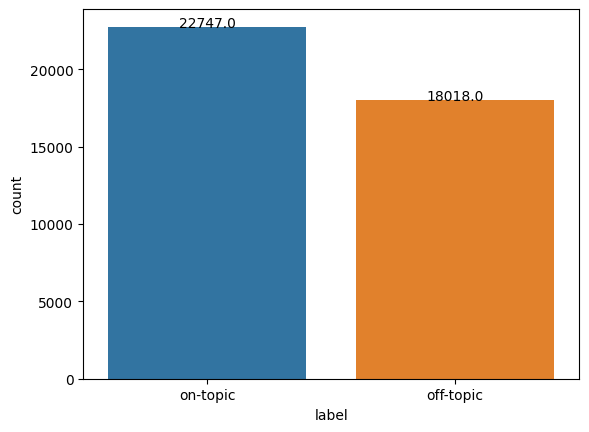

In [11]:
ax = sns.countplot(x="label", data=tweets_df)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

The count plot above indicates that the target tweet categories in our dataset are balanced. This visualisation serves as a starting point for further analysis, helping uncover patterns and relationships between tweet labels and other features.

In [18]:
# Validing for any null/na values present in the dataset
tweets_df.isnull().sum()

index     0
tweet     0
label     0
target    0
dtype: int64

To analyse the characteristics of on-topic and off-topic tweets, I grouped the data by the "label" column and used the describe() function to analyze distinguishing features of on-topic and off-topic tweets.

In [19]:
tweets_df.groupby('label').describe()

index                                                         \
             count         mean          std  min     25%     50%     75%   
label                                                                       
off-topic  18018.0  2771.712288  1832.015767  0.0  1318.0  2645.5  3976.0   
on-topic   22747.0  6627.194179  2479.475034  0.0  5524.0  7029.0  8519.0   

                     target                                     
               max    count mean  std  min  25%  50%  75%  max  
label                                                           
off-topic  10006.0  18018.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
on-topic   10032.0  22747.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [20]:
tweets_df.sample(10)

,index,tweet,label,target
30155,2566,RT @WCVB: #BREAKING: CNN's @JohnKingCNN report...,on-topic,1
7067,5057,"RT @RogerQuimbly: Fittingly for a homophobe, N...",off-topic,0
9610,6873,Our prayers to all those who are flood victims...,on-topic,1
24522,4119,@H4hospitality #mkr @mkr_au yeah sad really. H...,off-topic,0
19326,4370,"#Quincy , MA #Marketing #Job: Marketing / Comm...",off-topic,0
341,341,"People still flock to Florida and Texas, drawn...",on-topic,1
8130,5804,Santa hat in the Moore tornado debris today ht...,on-topic,1
11500,3231,I can see the sun!!!!,on-topic,1
16519,1608,What did you do? It smells like a hot foot forest,off-topic,0
4044,5153,Don't think I can sleep knowing that my bestfr...,on-topic,1


Creating a new column called "target" in the DataFrame tweets_df which replaces the values in the existing "label" column with numbers to represent the target variable. This conversion to numerical format, specifically binary values (0 and 1), is useful for classification models and allows for easier training and evaluation.

In [12]:
tweets_df['target'] = tweets_df['label'].replace({'on-topic': 1, 'off-topic': 0})
tweets_df.head()

,index,tweet,label,target
0,0,"CFS sounds alarm on climate change, disaster r...",on-topic,1
1,1,Martin Rowson on the climate crisis ‘final war...,on-topic,1
2,2,@backtolife_2023 Lies all lies no climate chan...,on-topic,1
3,3,UN scientists warn of climate disaster unless ...,on-topic,1
4,4,Since the occurrences of natural disasters hav...,on-topic,1


In [22]:
 tweets_df['target'].value_counts()

1    22747
0    18018
Name: target, dtype: int64

The code below shuffles the rows of the DataFrame to create a new DataFrame with a random order. This is done to ensure consistent and unbiased results, particularly during the development and testing of machine learning models. The resulting DataFrame retains the same rows as the original DataFrame but in a random order.

In [13]:
tweets_df = tweets_df.sample(frac=1.0, random_state=42)

# Reset the index to be in sync
tweets_df.reset_index(drop=True, inplace=True)


In [14]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40765 entries, 0 to 40764
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   40765 non-null  int64 
 1   tweet   40765 non-null  object
 2   label   40765 non-null  object
 3   target  40765 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


### Examining tweet column

The code below creates a new column called "tweet_length" in the DataFrame tweets_df, which indicates the number of characters in each tweet. This information can be valuable for analyzing tweet lengths, identifying outliers, and exploring potential connections with other variables in the dataset.

In [15]:
tweets_df['tweet_length'] = tweets_df["tweet"].apply(len)

In [16]:
tweets_df.head()

,index,tweet,label,target,tweet_length
0,5139,SWAT continue house-to-house searches in #Wate...,on-topic,1,137
1,3688,Out here providing lunch to the first responde...,on-topic,1,128
2,7540,I won't believe a storm is any kind of a threa...,on-topic,1,137
3,2645,@waiiwaii_kz N'waii i wanted to ask for advic...,off-topic,0,128
4,222,OMFG THIS USED TO BE ON THE RADIO ALL THE TIME,off-topic,0,46


In [17]:
tweets_df["tweet_length"].describe()

count    40765.000000
mean        96.173899
std         41.009253
min         10.000000
25%         64.000000
50%         96.000000
75%        131.000000
max        884.000000
Name: tweet_length, dtype: float64

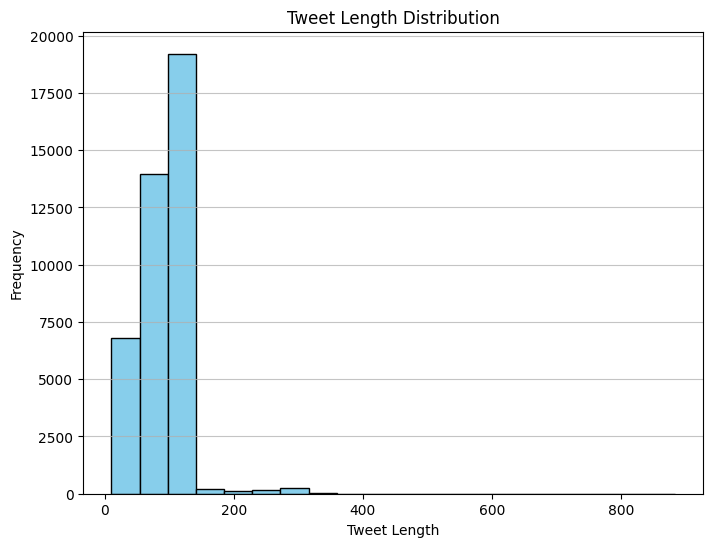

In [18]:
# Plot a histogram of tweet lengths
plt.figure(figsize=(8, 6))
plt.hist(tweets_df["tweet_length"], bins=20, color='skyblue', edgecolor='black')
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)

In [19]:
tweets_df[tweets_df['tweet_length']==159]['tweet'].iloc[0]

'Heads up, St. Clair County, IL residents - HUD will provide $30M to help with disaster recovery and build resilience to climate change. https://t.co/TbOYwrV8a8'

In [30]:
tweets_df.isnull().any()

index           False
tweet           False
label           False
target          False
tweet_length    False
dtype: bool

The visualization above compares the distribution of tweet lengths for on-topic and off-topic tweets. It reveals that there are over 7,000 tweets with a length around 140 characters, while there are only around 1,000 off-topic tweets with the same length. This suggests a potential difference or pattern in tweet length based on the target variable.

<Axes: xlabel='label', ylabel='tweet_length'>

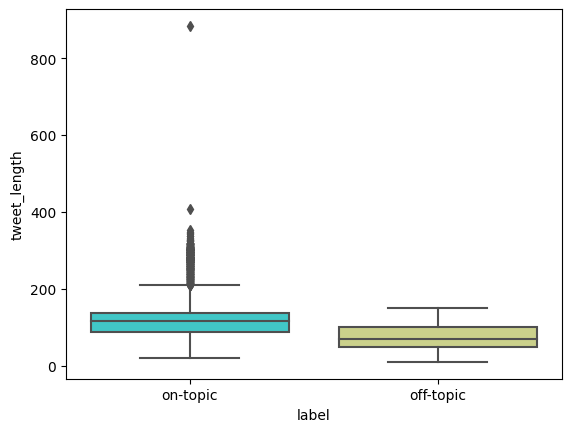

In [31]:
sns.boxplot(x='label',y='tweet_length',data=tweets_df,palette='rainbow')

The above boxplot shows that the given values for the tweet_length. one can clearly see the there are ouliers in the given column.

In [20]:
Q1 = tweets_df.groupby('label')['tweet_length'].quantile(0.25)
Q3 = tweets_df.groupby('label')['tweet_length'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [22]:
new_tweets_df = tweets_df[
    (tweets_df['tweet_length'] >= lower_bound[tweets_df['label']].values) &
    (tweets_df['tweet_length'] <= upper_bound[tweets_df['label']].values)
]


In [23]:
train_data_shuffled = new_tweets_df.sample(frac=1, random_state=42) 
train_data_shuffled.head()

,index,tweet,label,target,tweet_length
32922,4842,@EMUandhearts: @AshMash274: Think I should kno...,off-topic,0,128
28010,1384,@IDFSpokesperson @WorldVisionAus To Tim Costel...,off-topic,0,142
9018,8730,RT @TweetLikeAGirI: Hurricane Sandy is coming....,on-topic,1,64
12415,16,@NevaTRUST_Again I Dnt No If She Gonna Let Me,off-topic,0,45
5209,9866,Hurricane Sandy continues to slam. Winds & Rai...,on-topic,1,112


In [28]:
train_data_shuffled.shape

(40280, 5)

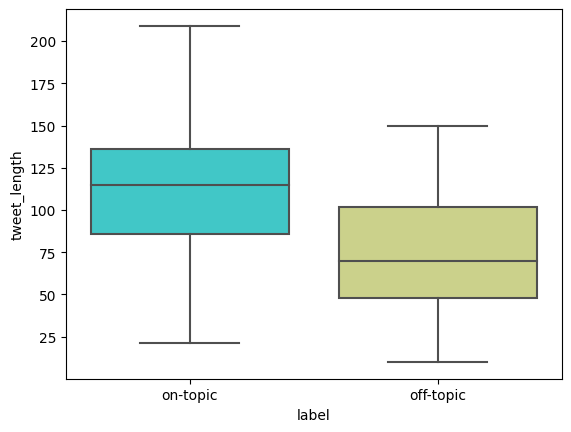

In [29]:
sns.boxplot(x='label', y='tweet_length', data=new_tweets_df, palette='rainbow')

plt.show()

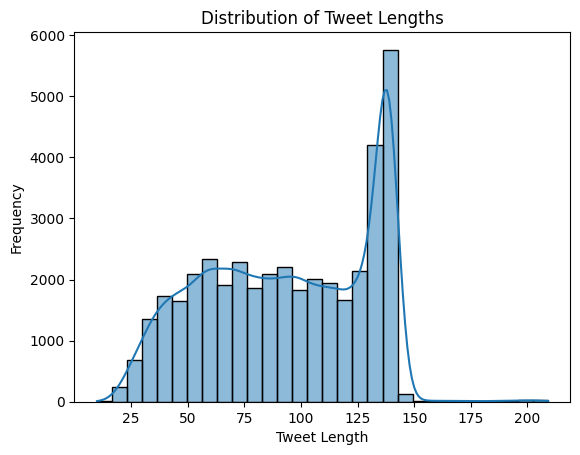

In [30]:
sns.histplot(data=new_tweets_df, x='tweet_length', bins=30, kde=True)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

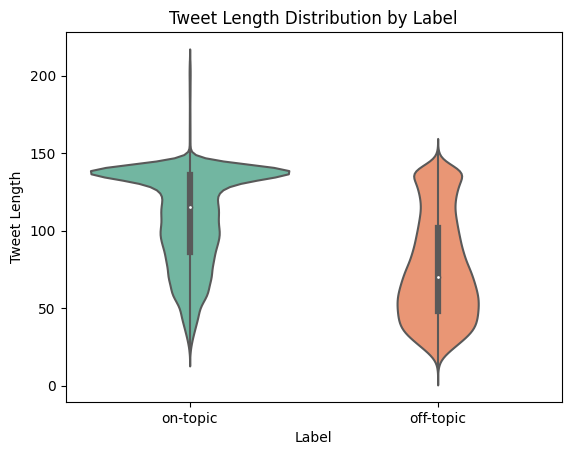

In [31]:
sns.violinplot(data=new_tweets_df, x='label', y='tweet_length', palette='Set2')
plt.xlabel('Label')
plt.ylabel('Tweet Length')
plt.title('Tweet Length Distribution by Label')
plt.show()

<Figure size 1200x600 with 0 Axes>

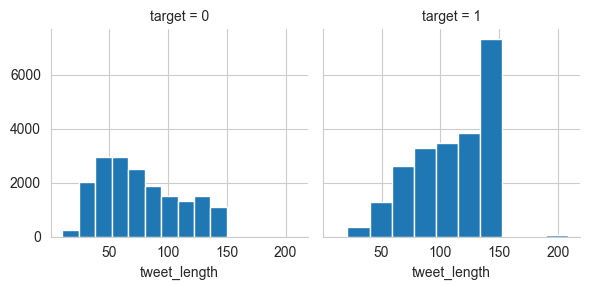

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(new_tweets_df,col='target')
g.map(plt.hist,'tweet_length')

The above graph shows the max and min value of tweet legth for target value 0 (means it is an off topic tweet) ranges between 15 to 150 and for target value 1 ranges between 25 to little more than 150 where the highest number of tweets for taget zero having maximumnumber of word counts is 50 tweet whereas for target value 1 it is 150 tweets having max count words

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


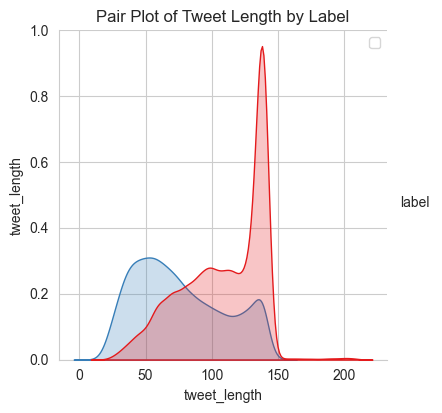

In [33]:

sns.pairplot(data=new_tweets_df, hue='label', vars=['tweet_length'], palette='Set1', height=4)


plt.title('Pair Plot of Tweet Length by Label')

plt.legend()

plt.show()

In [34]:
new_tweets_df.head()

,index,tweet,label,target,tweet_length
0,5139,SWAT continue house-to-house searches in #Wate...,on-topic,1,137
1,3688,Out here providing lunch to the first responde...,on-topic,1,128
2,7540,I won't believe a storm is any kind of a threa...,on-topic,1,137
3,2645,@waiiwaii_kz N'waii i wanted to ask for advic...,off-topic,0,128
4,222,OMFG THIS USED TO BE ON THE RADIO ALL THE TIME,off-topic,0,46


/var/folders/90/z90m58612ll5n4xq9_cfdrvw0000gn/T/ipykernel_30861/3816751076.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_tweets_df[new_tweets_df["target"] == 1]["tweet_length"], shade=True, label='Target 1', legend=True)
/var/folders/90/z90m58612ll5n4xq9_cfdrvw0000gn/T/ipykernel_30861/3816751076.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_tweets_df[new_tweets_df["target"] == 0]["tweet_length"], shade=True, label='Target 0', legend=True)


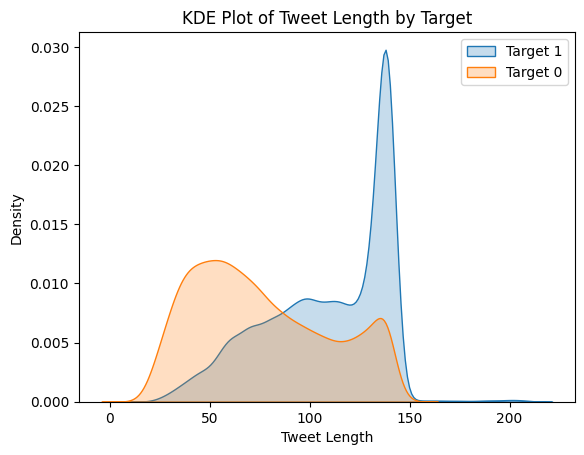

In [24]:
# Create kernel density estimate (KDE) plots for tweet lengths by target
sns.kdeplot(new_tweets_df[new_tweets_df["target"] == 1]["tweet_length"], shade=True, label='Target 1', legend=True)
sns.kdeplot(new_tweets_df[new_tweets_df["target"] == 0]["tweet_length"], shade=True, label='Target 0', legend=True)


plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.title('KDE Plot of Tweet Length by Target')
plt.legend()


plt.show()

In [36]:
new_tweets_df['tweet_word_length'] = new_tweets_df['tweet'].apply(lambda x: len(str(x).split()))


/var/folders/90/z90m58612ll5n4xq9_cfdrvw0000gn/T/ipykernel_82169/3726394184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tweets_df['tweet_word_length'] = new_tweets_df['tweet'].apply(lambda x: len(str(x).split()))


In [37]:
new_tweets_df

,index,tweet,label,target,tweet_length,tweet_word_length
0,5139,SWAT continue house-to-house searches in #Wate...,on-topic,1,137,17
1,3688,Out here providing lunch to the first responde...,on-topic,1,128,14
2,7540,I won't believe a storm is any kind of a threa...,on-topic,1,137,26
3,2645,@waiiwaii_kz N'waii i wanted to ask for advic...,off-topic,0,128,25
4,222,OMFG THIS USED TO BE ON THE RADIO ALL THE TIME,off-topic,0,46,11
...,...,...,...,...,...,...
40760,2468,Uploading a vid. Don't forget the one from yes...,off-topic,0,92,15
40761,5834,How to talk with children about the tragedy in...,on-topic,1,136,23
40762,1015,There's nothing stronger than America....other...,off-topic,0,72,9
40763,9262,@Real_Liam_Payne Going to sleep.. it's 1am & I...,on-topic,1,139,26


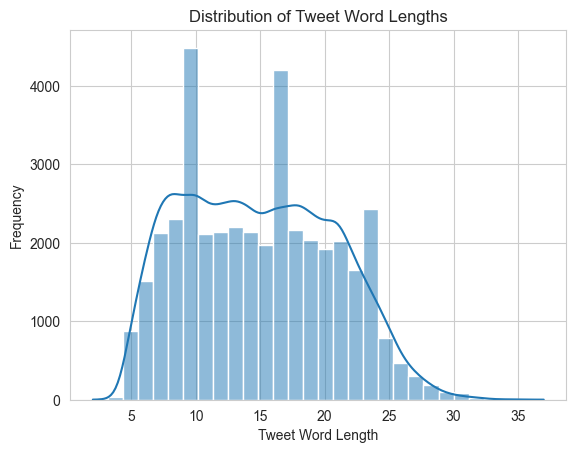

In [38]:
sns.histplot(data=new_tweets_df, x='tweet_word_length', bins=30, kde=True)
plt.xlabel('Tweet Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Word Lengths')
plt.show()

/var/folders/90/z90m58612ll5n4xq9_cfdrvw0000gn/T/ipykernel_82169/489651730.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_tweets_df[new_tweets_df["target"] == 1]["tweet_word_length"], shade=True, label='Target 1', legend=True)
/var/folders/90/z90m58612ll5n4xq9_cfdrvw0000gn/T/ipykernel_82169/489651730.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_tweets_df[new_tweets_df["target"] == 0]["tweet_word_length"], shade=True, label='Target 0', legend=True)


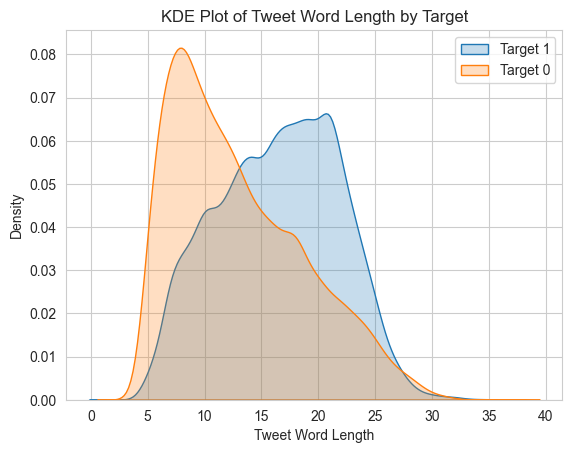

In [39]:
# Create kernel density estimate (KDE) plots for tweet lengths by target
sns.kdeplot(new_tweets_df[new_tweets_df["target"] == 1]["tweet_word_length"], shade=True, label='Target 1', legend=True)
sns.kdeplot(new_tweets_df[new_tweets_df["target"] == 0]["tweet_word_length"], shade=True, label='Target 0', legend=True)

plt.xlabel('Tweet Word Length')
plt.ylabel('Density')
plt.title('KDE Plot of Tweet Word Length by Target')
plt.legend()


plt.show()

# Text Pre-processing in NLP using ML

Text preprocessing in NLP (Natural Language Processing) refers to the steps taken to clean and transform raw text data into a format that is more suitable for analysis and modeling. Below is how I have preprocessed the data using ML.


### Removing stopwords

In [40]:
from nltk.corpus import stopwords
stop_words = [word for word in stopwords.words('english')[:10]]
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [41]:
import string

mess = 'hello!! whats your name? My name is Sagrika'
# Removing punctuation marks using str.translate()
nopunc = mess.translate(str.maketrans("", "", string.punctuation))

In [42]:
nopunc.split()

['hello', 'whats', 'your', 'name', 'My', 'name', 'is', 'Sagrika']

In [43]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [44]:
clean_mess

['hello', 'whats', 'name', 'name', 'Sagrika']

In [45]:
def tweet_process(mess):
    # Remove punctuation
    nopunc = ''.join(char for char in mess if char not in string.punctuation)
    
    # Split the string into words and remove stopwords
    words = nopunc.split()
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    
    return words

In [46]:
new_tweets_df.head()

,index,tweet,label,target,tweet_length,tweet_word_length
0,5139,SWAT continue house-to-house searches in #Wate...,on-topic,1,137,17
1,3688,Out here providing lunch to the first responde...,on-topic,1,128,14
2,7540,I won't believe a storm is any kind of a threa...,on-topic,1,137,26
3,2645,@waiiwaii_kz N'waii i wanted to ask for advic...,off-topic,0,128,25
4,222,OMFG THIS USED TO BE ON THE RADIO ALL THE TIME,off-topic,0,46,11


In [47]:
new_tweets_df.reset_index(drop=True, inplace=True)


In [48]:
new_tweets_df

,index,tweet,label,target,tweet_length,tweet_word_length
0,5139,SWAT continue house-to-house searches in #Wate...,on-topic,1,137,17
1,3688,Out here providing lunch to the first responde...,on-topic,1,128,14
2,7540,I won't believe a storm is any kind of a threa...,on-topic,1,137,26
3,2645,@waiiwaii_kz N'waii i wanted to ask for advic...,off-topic,0,128,25
4,222,OMFG THIS USED TO BE ON THE RADIO ALL THE TIME,off-topic,0,46,11
...,...,...,...,...,...,...
40275,2468,Uploading a vid. Don't forget the one from yes...,off-topic,0,92,15
40276,5834,How to talk with children about the tragedy in...,on-topic,1,136,23
40277,1015,There's nothing stronger than America....other...,off-topic,0,72,9
40278,9262,@Real_Liam_Payne Going to sleep.. it's 1am & I...,on-topic,1,139,26


In [49]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

### Tokenization

Tokenization is the process of converting a text string into a list of individual words or tokens.

In [50]:
tokenized_tweets = new_tweets_df['tweet'].apply(tweet_process)

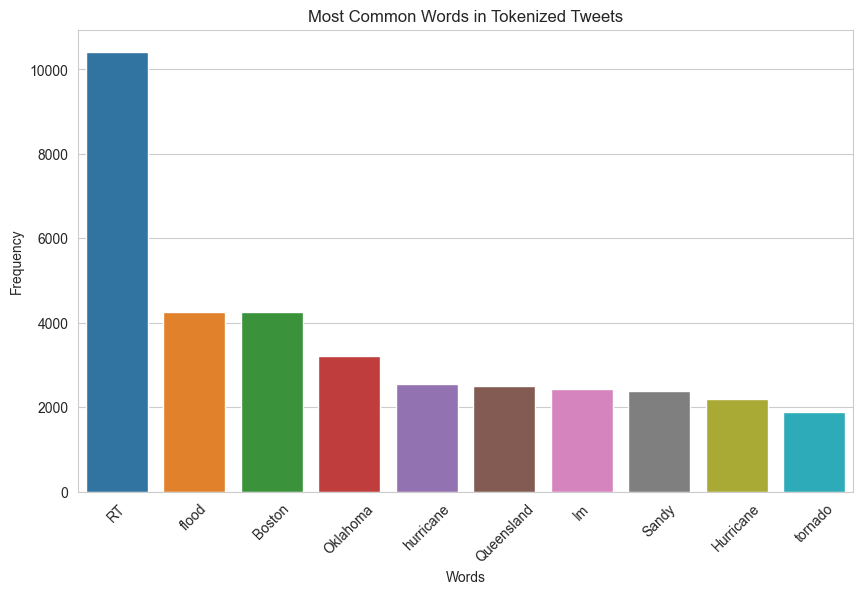

In [51]:
all_tokens = [token for tweet_tokens in tokenized_tweets for token in tweet_tokens]

# Calculate word frequency using FreqDist
fdist = FreqDist(all_tokens)

# Create a figure and plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, freq in fdist.most_common(10)],
            y=[freq for word, freq in fdist.most_common(10)])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Tokenized Tweets')
plt.xticks(rotation=45)
plt.show()

In [52]:
tokenized_disaster_tweets = new_tweets_df[new_tweets_df['target'] == 1]['tweet'].apply(tweet_process)

In [53]:
tokenized_non_disaster_tweets = new_tweets_df[new_tweets_df['target'] == 0]['tweet'].apply(tweet_process)

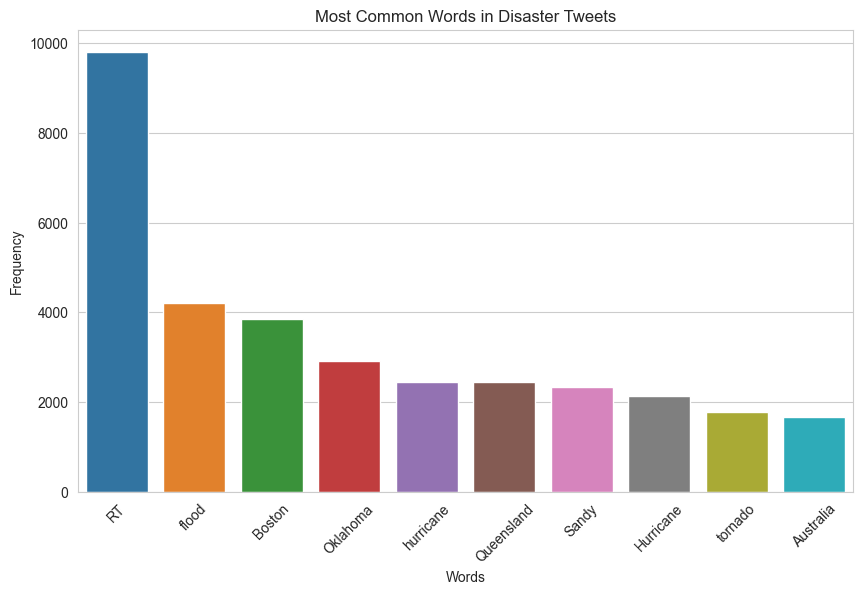

In [54]:
all_tokens = [token for tweet_tokens in tokenized_disaster_tweets for token in tweet_tokens]

# Calculate word frequency using FreqDist
fdist = FreqDist(all_tokens)

# Create a figure and plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, freq in fdist.most_common(10)],
            y=[freq for word, freq in fdist.most_common(10)])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Disaster Tweets')
plt.xticks(rotation=45)
plt.show()

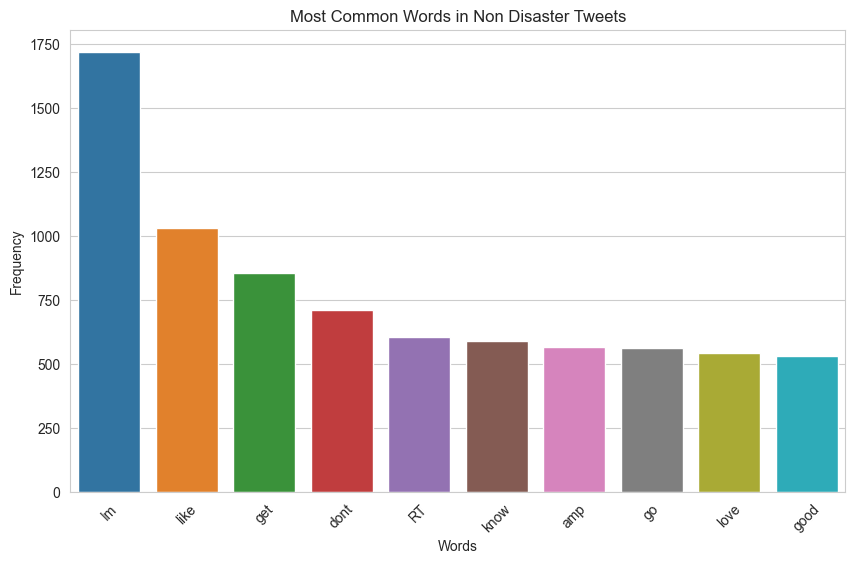

In [55]:
all_tokens = [token for tweet_tokens in tokenized_non_disaster_tweets for token in tweet_tokens]

# Calculate word frequency using FreqDist
fdist = FreqDist(all_tokens)

# Create a figure and plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, freq in fdist.most_common(10)],
            y=[freq for word, freq in fdist.most_common(10)])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Non Disaster Tweets')
plt.xticks(rotation=45)
plt.show()

In [56]:
from wordcloud import WordCloud

### Word cloud for Disaster tweets

In [57]:
tokenized_tweets_as_strings = []
for tokens in tokenized_disaster_tweets:
    if isinstance(tokens, list):
        tokenized_tweets_as_strings.append(' '.join(tokens))
    else:
        tokenized_tweets_as_strings.append('')  # Empty string for non-list elements

# Create a new Series from the list of strings
tokenized_disaster_tweets_as_strings_series = pd.Series(tokenized_tweets_as_strings)

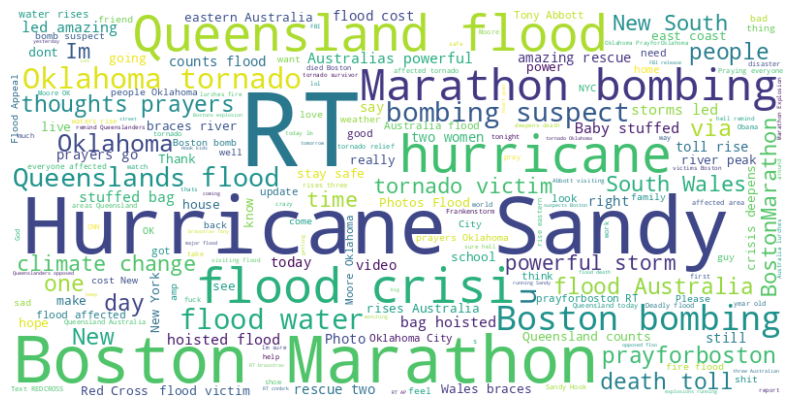

In [58]:
combined_text = ' '.join(tokenized_disaster_tweets_as_strings_series)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


### Word cloud for Non Disaster tweets

In [59]:
tokenized_tweets_as_strings = []
for tokens in tokenized_non_disaster_tweets:
    if isinstance(tokens, list):
        tokenized_tweets_as_strings.append(' '.join(tokens))
    else:
        tokenized_tweets_as_strings.append('')  # Empty string for non-list elements

# Create a new Series from the list of strings
tokenized_non_disaster_tweets_as_strings_series = pd.Series(tokenized_tweets_as_strings)

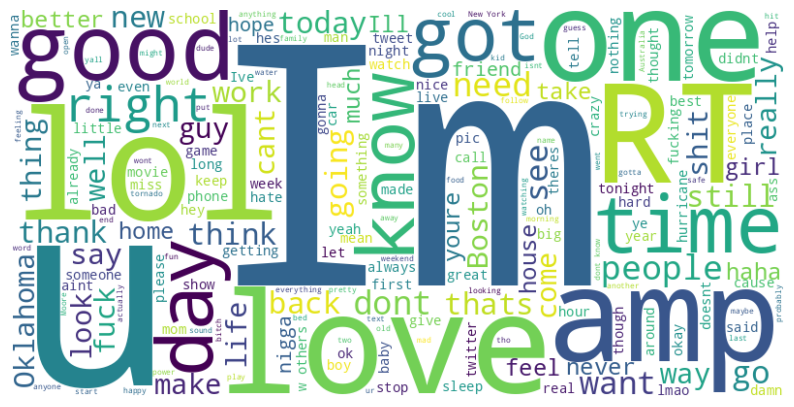

In [60]:
combined_text = ' '.join(tokenized_non_disaster_tweets_as_strings_series)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


### Vectorization
Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
text_vectorizer = CountVectorizer(analyzer=tweet_process)
text_vectorizer.fit(new_tweets_df['tweet'])


CountVectorizer(analyzer=<function tweet_process at 0x1696af560>)

In [63]:
#Print total number of vocab words
print(len(text_vectorizer.vocabulary_))

66923


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new text_vectorizer:

In [64]:
message4 = new_tweets_df['tweet'][2]
print(message4)

I won't believe a storm is any kind of a threat until I see Anderson Cooper on CNN in his red jacket getting pelted by rain.#Frankenstorm


In [65]:
text_vectorizer4 = text_vectorizer.transform([message4])
print(text_vectorizer4)

  (0, 2623)	1
  (0, 5289)	1
  (0, 6706)	1
  (0, 29693)	1
  (0, 36949)	1
  (0, 51126)	1
  (0, 52124)	1
  (0, 56834)	1
  (0, 58311)	1
  (0, 58620)	1
  (0, 60132)	1
  (0, 61960)	1
  (0, 63358)	1
  (0, 65842)	1


It means there are 8 unique words in message4. Above is the vector representation of message 4

After transforming the tweets_df['tweet'] column using the text_vectorizer(previously created CountVectorizer object), we can now use the .transform method to convert the entire DataFrame of tweets into bag-of-words counts. This process involves representing each tweet as a vector that counts the occurrence of each word in the vocabulary.

In [66]:
messages_bow = text_vectorizer.transform(new_tweets_df['tweet'])

In [67]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (40280, 66923)
Amount of Non-Zero occurences:  379513


In [68]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.






### TF-IDF

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(text_vectorizer4)
print(tfidf4)

  (0, 65842)	0.21497486632158047
  (0, 63358)	0.25449977281408354
  (0, 61960)	0.19637054151062697
  (0, 60132)	0.17746373002035393
  (0, 58620)	0.24668506846220284
  (0, 58311)	0.3713925530337045
  (0, 56834)	0.3713925530337045
  (0, 52124)	0.2556159370058668
  (0, 51126)	0.3133629995701466
  (0, 36949)	0.2002680813157791
  (0, 29693)	0.2158455009419205
  (0, 6706)	0.29854479070707607
  (0, 5289)	0.20649662805747052
  (0, 2623)	0.31660735408783625


In [70]:
print(tfidf_transformer.idf_[text_vectorizer.vocabulary_['say']])
print(tfidf_transformer.idf_[text_vectorizer.vocabulary_['city']])

5.660835797614117
6.074206085229394


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [71]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(40280, 66923)


# Model Training
With messages represented as vectors, we can finally train our classifier. 

## Model 0: Naive Bayes using ML

In [139]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(messages_tfidf, new_tweets_df['label'], test_size=0.2, random_state=42)


In [140]:
from sklearn.naive_bayes import MultinomialNB
disastertweet_detect_model= MultinomialNB().fit(X_train, y_train)

Let's test the performance of our classifier by classifying a single random message and evaluating the results. This will help us assess the effectiveness of our model.

In [157]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(train_data_shuffled['tweet'].to_numpy(), 
                                                                train_data_shuffled['target'].to_numpy(),
                                                                test_size=0.2, random_state=42)

# Creating a Data Pipeline
To predict on the test set, we will re-run our model using SciKit Learn's pipeline. The pipeline allows us to set up and store a sequence of transformations and apply them to the data in a consistent manner. This enables us to streamline our workflow and easily apply the same transformations to new data.

In [158]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=tweet_process)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

In [159]:
pipeline

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function tweet_process at 0x1696af560>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [160]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function tweet_process at 0x1696af560>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [161]:
predictions = pipeline.predict(msg_test)

#  Model Evaluation
Now we want to determine how well our model will do overall on the entire dataset. Let's begin by getting all the predictions:

In [166]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3289
           1       0.93      0.87      0.90      4767

    accuracy                           0.88      8056
   macro avg       0.88      0.88      0.88      8056
weighted avg       0.88      0.88      0.88      8056



In [163]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_classification_metrics(true_labels, predicted_labels):

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predicted_labels) * 100
    
    # Calculate precision, recall, and F1-score (weighted average)
    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average="weighted")
    
    # Create a dictionary to store the results
    metrics = {
        "Accuracy": accuracy,
        "Precision (weighted)": precision,
        "Recall (weighted)": recall,
        "F1-Score (weighted)": f1_score
    }
    
    return metrics


In [164]:
calculate_classification_metrics(predictions,label_test)

{'Accuracy': 88.07100297914597,
 'Precision (weighted)': 0.8846347451583684,
 'Recall (weighted)': 0.8807100297914597,
 'F1-Score (weighted)': 0.8813850779166976}

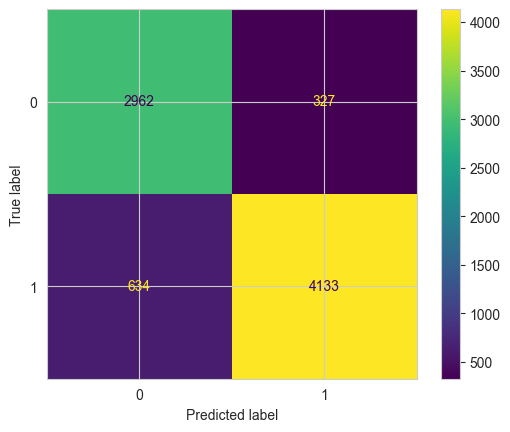

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = disastertweet_detect_model.predict(messages_tfidf)
confusion_matrix = confusion_matrix(predictions,label_test)

disp = ConfusionMatrixDisplay(confusion_matrix)

disp.plot()

plt.show()


In [171]:
baseline_score = pipeline.score(msg_test, label_test)
print(f"The baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

The baseline model achieves an accuracy of: 88.07%


In [109]:
# Getting baseline results
baseline_results = calculate_classification_metrics(true_labels=label_test,
                                     predicted_labels=baseline_preds)
baseline_results

{'Accuracy': 92.89970208540218,
 'Precision (weighted)': 0.9291326517056191,
 'Recall (weighted)': 0.9289970208540218,
 'F1-Score (weighted)': 0.9290369074751882}

# NLP with Tensorflow (deep learning)

In [92]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(tweets_df)-5) # create random indexes not higher than the total number of samples
for row in train_data_shuffled[["tweet", "target"]][random_index:random_index+5].itertuples():
    _, tweet, target = row
    print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
    print(f"Tweet:\n{tweet}\n")
    print("---\n")

Target: 1 (real disaster)
Tweet:
I've received 3 emails today from @Equinox inviting me in for a free workout during #sandy. Thanks, but maybe a rain check? #punintended

---

Target: 1 (real disaster)
Tweet:
Truly is a sad sight to see in Moore...

---

Target: 1 (real disaster)
Tweet:
RT @nialls_swag: Queensland, the only state to have flood, tornado and fire warnings all in one night.

---

Target: 1 (real disaster)
Tweet:
RT @VinniesVictoria: RT @vinniesact: For those who wish to contribute to the Flood Relief in Queensland, Vinnies has a QLD Flood Appeal. ...

---

Target: 1 (real disaster)
Tweet:
@AKitz: The bomb squad has gone through the backpacks #mitshooting #mit #boston http://t.co/dtC2fMzwL2

---



In [93]:
# View the first 10 training sentences and their labels
msg_train[:10], label_train[:10]

(array(['More #Sandy destruction in #Brooklyn. My family and our things are fine, some of our  @ Ft. Greene, Brooklyn http://t.co/MI0M1nRo',
        'Despite all the disaster happening around us- these past few days have been glorious with @LindseyForeman! My BFF &gt; Yours',
        '@IHaveNiamFeels @@jaybuenvenida14 @Real_Liam_Payne no  this is HOT http://t.co/xB6pCC2P',
        '"This payment will support the province of Saskatchewan with its recovery and rebuilding efforts as we work together to adapt to the impacts of climate change. @BillBlair \n\nhttps://t.co/OzFzJ5HKaf',
        "Unreal damage throughout. Never thought I'd be glad to live in ozone park. All the best to everyone south of crossbay and rockaway",
        'RT @glennbeck: Crossing the Red river.  2:31am officially in Oklahoma. 20 children dead. #s still climbing. Be who you promised to always b…',
        'I feel like my dad fucked with Aaron more than anyone from North hahaha',
        'I love Spanish girls &gt;&gt

In [72]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [76]:
vectorizer = TextVectorization(max_tokens=None, 
                                    standardize="lower_and_strip_punctuation", 
                                    split="whitespace",
                                    ngrams=None, 
                                    output_mode="int",
                                    output_sequence_length=None) 

In [77]:

round(sum([len(i.split()) for i in msg_train])/len(msg_train))

15

Now let's create another TextVectorization object using our custom parameters.

In [78]:
max_vocab_length = 10000 
max_length = 15 

vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [79]:

vectorizer.adapt(msg_train)

In [80]:

sample_sentence = " no matter the size of the sequence!!"
vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  54, 1064,    2, 2150,    8,    2,    1,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [84]:
random_sentence = random.choice(msg_train)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
vectorizer([random_sentence])

Original text:
20% of May web sales at http://t.co/WcnjSNRw1y will be donated to @SavetheChildren supporting their efforts in Oklahoma!  free shipping now~      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 605,    8,  215, 2642, 1584,   20,    1,   58,   26,  566,    3,
        7791, 1939,  137,  738]])>

In [85]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, 
                             output_dim=128, 
                             embeddings_initializer="uniform", 
                             input_length=max_length, 
                             name="embedding_1") 

embedding

In [102]:

random_sentence = random.choice(msg_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")


sample_embed = embedding(vectorizer([random_sentence]))
sample_embed

Original text:
A heads-up everyone--someone with the username Boston Marathon is saying for every retweet it will donate $1 to the victims. It's fake...      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03082455,  0.01346977, -0.03472788, ...,  0.03660123,
         -0.02527291, -0.03576065],
        [-0.04163083,  0.00386507,  0.02261269, ...,  0.03228908,
         -0.01477363,  0.03386757],
        [-0.04163083,  0.00386507,  0.02261269, ...,  0.03228908,
         -0.01477363,  0.03386757],
        ...,
        [ 0.00171798,  0.04157504, -0.01038399, ..., -0.04397557,
          0.04100764,  0.02244494],
        [ 0.0291847 ,  0.01739973, -0.04555056, ...,  0.01280309,
          0.00820287,  0.02613722],
        [-0.04395741, -0.03518432,  0.00028256, ..., -0.04183638,
          0.03348707,  0.03556837]]], dtype=float32)>

Each token in the sentence gets turned into a length 128 feature vector.

In [103]:

sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.03082455,  0.01346977, -0.03472788,  0.01816097, -0.00144665,
       -0.04335277, -0.01210349,  0.00129901,  0.02407429,  0.02034714,
       -0.0179248 ,  0.02872727,  0.0373266 , -0.01199799, -0.03229883,
       -0.02678587,  0.02439198,  0.02249265,  0.00122195, -0.02126603,
       -0.04037512,  0.04054368,  0.01791931, -0.01254607, -0.03130406,
        0.02976406,  0.03655722,  0.03259284,  0.04037999, -0.00757385,
        0.03862054,  0.01473926, -0.00839485,  0.01925612, -0.03586509,
       -0.02321732, -0.00363491,  0.03070388, -0.00945381, -0.03364547,
        0.02449013, -0.04923713,  0.04094366,  0.04908798, -0.01820137,
        0.00636433, -0.00811031,  0.03162063, -0.03470154, -0.01172947,
        0.02673652,  0.03286735, -0.03951409, -0.03937294,  0.04395118,
        0.03462474, -0.03550383, -0.03669144,  0.04995581, -0.04910885,
        0.02979011,  0.01873675, -0.03696461,  0.00924753,  0.03827361,
        0.019436

## Model 1:  Random Forest

In [104]:
pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_1 = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Step 1: TF-IDF vectorizer
    ('rf', RandomForestClassifier())  # Step 2: Random Forest classifier
])

# Fit the pipeline to the training data
model_1.fit(msg_train, label_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [211]:
type(msg_test)

numpy.ndarray

In [173]:
predictions = model_1.predict(msg_test)

In [174]:
calculate_classification_metrics(predictions,label_test)

{'Accuracy': 92.99900695134062,
 'Precision (weighted)': 0.9299625854105587,
 'Recall (weighted)': 0.9299900695134061,
 'F1-Score (weighted)': 0.9299575708282697}

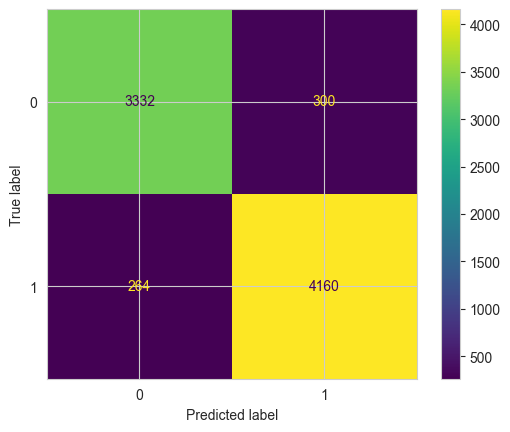

In [175]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = disastertweet_detect_model.predict(messages_tfidf)
confusion_matrix = confusion_matrix(predictions,label_test)

disp = ConfusionMatrixDisplay(confusion_matrix)

disp.plot()

plt.show()


In [177]:
confusion_matrix

array([[3332,  300],
       [ 264, 4160]])

## Model 2 : Feed-forward neural network (dense model)

In [86]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [178]:
SAVE_DIR = "C:/Users/sagri/anaconda3/lib/site-packages"

In [179]:

max_vocab_size = 10000
max_seq_length = 15


text_vectorizer = TextVectorization(max_tokens=max_vocab_size,
                                    output_mode="int",
                                    output_sequence_length=max_seq_length)


text_vectorizer.adapt(msg_train)

embedding_layer = layers.Embedding(input_dim=max_vocab_size,
                            output_dim=128,
                            embeddings_initializer="uniform",
                            input_length=max_seq_length,
                            name="embedding_1")


inputs = layers.Input(shape=(1,), dtype="string") 


vectorized_text = text_vectorizer(inputs)


embedded_text = embedding_layer(vectorized_text)


pooled_text = layers.GlobalAveragePooling1D()(embedded_text)


outputs = layers.Dense(1, activation="sigmoid")(pooled_text)


model_2 = tf.keras.Model(inputs, outputs, name="model_2_dense")

In [180]:

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [181]:

model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_11 (Tex  (None, 15)                0         
 tVectorization)                                                 
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [199]:

model_2_history = model_2.fit(msg_train, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              label_train,
                              epochs=5,
                              validation_data=(msg_test, label_test),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: C:/Users/sagri/anaconda3/lib/site-packages/simple_dense_model/20230917-182855
Epoch 1/5
1007/1007 [==============================] - 6s 5ms/step - loss: 0.3147 - accuracy: 0.8842 - val_loss: 0.2180 - val_accuracy: 0.9203
Epoch 2/5
1007/1007 [==============================] - 5s 5ms/step - loss: 0.1913 - accuracy: 0.9322 - val_loss: 0.2110 - val_accuracy: 0.9250
Epoch 3/5
1007/1007 [==============================] - 5s 5ms/step - loss: 0.1655 - accuracy: 0.9418 - val_loss: 0.2160 - val_accuracy: 0.9227
Epoch 4/5
1007/1007 [==============================] - 5s 5ms/step - loss: 0.1486 - accuracy: 0.9486 - val_loss: 0.2300 - val_accuracy: 0.9184
Epoch 5/5
1007/1007 [==============================] - 5s 4ms/step - loss: 0.1358 - accuracy: 0.9538 - val_loss: 0.2424 - val_accuracy: 0.9173


/var/folders/90/z90m58612ll5n4xq9_cfdrvw0000gn/T/ipykernel_95304/4282255864.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


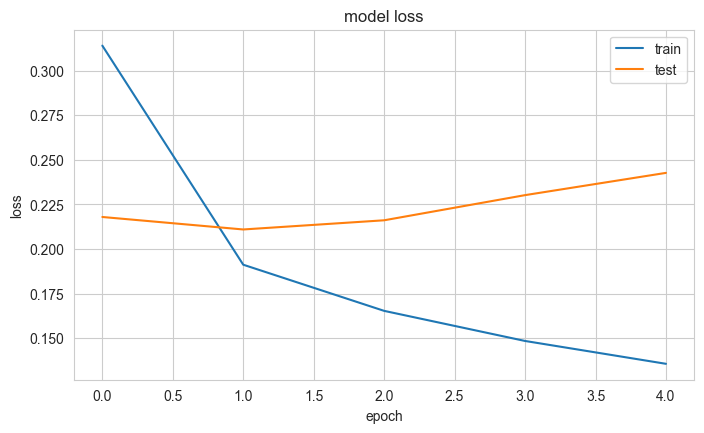

In [142]:
fig, ax = plt.subplots(figsize=(8, 10))
plt.subplot(2,1,2)
plt.plot(model_2_history.history['loss'])
plt.plot(model_2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [143]:
model_2.evaluate(msg_test,label_test)

252/252 [==============================] - 0s 487us/step - loss: 0.2427 - accuracy: 0.9168


[0.24269889295101166, 0.9168321490287781]

In [144]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.0368816 ,  0.0338487 , -0.07596797, ..., -0.02086279,
          0.06715935, -0.03375552],
        [ 0.01042903,  0.07496371, -0.03416032, ...,  0.00019991,
          0.04901699, -0.04010763],
        [-0.04401532, -0.04428254,  0.05241492, ...,  0.04283906,
          0.01868142,  0.0428067 ],
        ...,
        [ 0.0959016 ,  0.16133551, -0.11630378, ...,  0.14013548,
          0.16260879, -0.07523225],
        [ 0.12423287,  0.13685964, -0.12449023, ...,  0.09119125,
          0.08757633, -0.15178771],
        [ 0.09650299,  0.14577828, -0.1434406 , ...,  0.09908041,
          0.07665749, -0.0836671 ]], dtype=float32)>]

In [145]:
embed_weights = model_2.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [200]:
# Make predictions (these will come back in the form of probabilities)
model_2_pred_probs = model_2.predict(msg_test)

model_2_pred_probs[:5] 

252/252 [==============================] - 0s 563us/step


array([[0.9885254 ],
       [0.99700135],
       [0.9999995 ],
       [0.9531068 ],
       [0.99999934]], dtype=float32)

In [201]:

model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>

In [202]:
model_2_results = calculate_classification_metrics(label_test, model_2_preds)
model_2_results

{'Accuracy': 91.73286991062562,
 'Precision (weighted)': 0.9177946514915172,
 'Recall (weighted)': 0.9173286991062563,
 'F1-Score (weighted)': 0.9174251963780955}

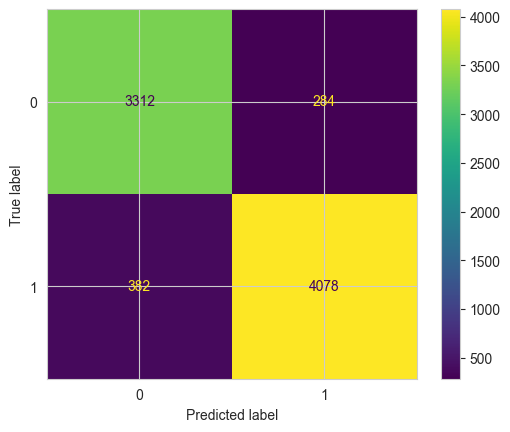

In [203]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


confusion_matrix = confusion_matrix(label_test,model_2_preds)

disp = ConfusionMatrixDisplay(confusion_matrix)

disp.plot()

plt.show()


How about we compare our first deep model to our baseline model?

In [151]:
import numpy as np
np.array(list(model_2_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

The above output shows the comparision of model_2 with the model_1 which was our baseline model. This comparision shows that the still our model_1 is the best model. As it failed to beat the scores in all 4 metrics i.e, Accuracy, precision, Recall, F1-Score

In [154]:
# Create a function to compare our baseline results to new model results
def compare_results(baseline_results, new_results):
    for metric, baseline_value in baseline_results.items():
        new_value = new_results.get(metric, None)
        if new_value is not None:
            difference = new_value - baseline_value
            print(f"Metric: {metric}, Baseline: {baseline_value:.2f}, New: {new_value:.2f}, Difference: {difference:.2f}")
        else:
            print(f"Metric: {metric}, Baseline: {baseline_value:.2f}, New: Not available")
            
compare_results(baseline_results=baseline_results, new_results=model_2_results)

Metric: Accuracy, Baseline: 92.81, New: 91.68, Difference: -1.13
Metric: Precision (weighted), Baseline: 0.93, New: 0.92, Difference: -0.01
Metric: Recall (weighted), Baseline: 0.93, New: 0.92, Difference: -0.01
Metric: F1-Score (weighted), Baseline: 0.93, New: 0.92, Difference: -0.01


## Model 3: LSTM- powered RNN

In [183]:
# Define the maximum vocabulary size and maximum sequence length
max_vocab_size = 10000
max_seq_length = 15

# Initializing the TextVectorization layer
text_vectorizer = TextVectorization(max_tokens=max_vocab_size,
                                    output_mode="int",
                                    output_sequence_length=max_seq_length)

# Adapt layer to the training data
text_vectorizer.adapt(msg_train)

# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)

x = model_3_embedding(x)

x = layers.LSTM(64)(x) # return vector for whole sequence
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_LSTM")

In [184]:

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [185]:
model_3.summary()

Model: "model_3_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_12 (Tex  (None, 15)                0         
 tVectorization)                                                 
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                      

In [186]:
model_3_history = model_3.fit(msg_train,
                              label_train,
                              epochs=5,
                              validation_data=(msg_test, label_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: C:/Users/sagri/anaconda3/lib/site-packages/LSTM/20230917-175818
Epoch 1/5
1007/1007 [==============================] - 15s 13ms/step - loss: 0.2447 - accuracy: 0.9061 - val_loss: 0.2034 - val_accuracy: 0.9230
Epoch 2/5
1007/1007 [==============================] - 12s 12ms/step - loss: 0.1687 - accuracy: 0.9398 - val_loss: 0.2124 - val_accuracy: 0.9168
Epoch 3/5
1007/1007 [==============================] - 12s 12ms/step - loss: 0.1352 - accuracy: 0.9500 - val_loss: 0.2344 - val_accuracy: 0.9155
Epoch 4/5
1007/1007 [==============================] - 12s 12ms/step - loss: 0.1059 - accuracy: 0.9612 - val_loss: 0.2764 - val_accuracy: 0.9090
Epoch 5/5
1007/1007 [==============================] - 12s 12ms/step - loss: 0.0815 - accuracy: 0.9689 - val_loss: 0.3304 - val_accuracy: 0.9059


In [187]:
# Make predictions on the validation dataset
model_3_pred_probs = model_3.predict(msg_test)

# Round out predictions and reduce to 1-dimensional array
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))


252/252 [==============================] - 1s 3ms/step


In [188]:

model_3_results = calculate_classification_metrics(label_test,model_3_preds)
model_3_results

{'Accuracy': 90.59086395233366,
 'Precision (weighted)': 0.9059302668300319,
 'Recall (weighted)': 0.9059086395233367,
 'F1-Score (weighted)': 0.9057541960124806}

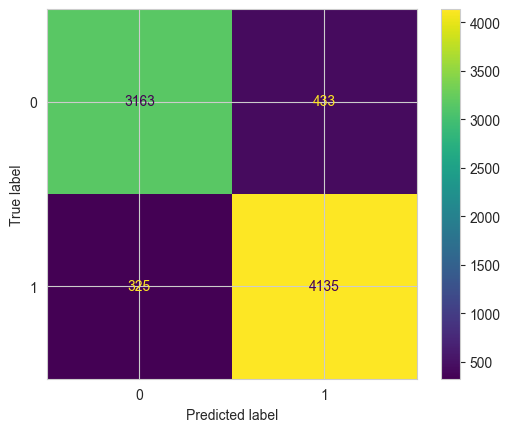

In [189]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


confusion_matrix = confusion_matrix(label_test,model_3_preds)

disp = ConfusionMatrixDisplay(confusion_matrix)

disp.plot()

plt.show()


In [190]:
confusion_matrix

array([[3163,  433],
       [ 325, 4135]])

In [177]:
# Compare model 3 to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline Accuracy: 92.81, New Accuracy: 90.89, Difference: -1.92
Baseline Precision (weighted): 0.93, New Precision (weighted): 0.91, Difference: -0.02
Baseline Recall (weighted): 0.93, New Recall (weighted): 0.91, Difference: -0.02
Baseline F1-Score (weighted): 0.93, New F1-Score (weighted): 0.91, Difference: -0.02


Even with model 3 (LSTM), our simple baseline model that used the Random forest classifiers performed the best which is clear from the above comparision

## Model 4: Bidirectional LSTM - powered RNN

In [191]:

max_vocab_size = 10000
max_seq_length = 15


text_vectorizer = TextVectorization(max_tokens=max_vocab_size,
                                    output_mode="int",
                                    output_sequence_length=max_seq_length)

# Adapt layer to the training data
text_vectorizer.adapt(msg_train)

# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
model_3_embedding = layers.Embedding(input_dim=max_vocab_size,
                              output_dim=128,
                              embeddings_initializer="uniform",
                              input_length=max_seq_length,
                              name="embedding_3")

# Create a more complex LSTM-based model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)

# Add Bidirectional LSTM layers with dropout for regularization
x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)
x = layers.Dropout(0.5)(x)

x = layers.Bidirectional(layers.LSTM(128))(x)
x = layers.Dropout(0.5)(x)

# Add Dense layers for final predictions
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the enhanced model
model_4 = tf.keras.Model(inputs, outputs, name="model_4_BI_LSTM")


In [192]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [193]:
model_4.summary()

Model: "model_4_BI_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_13 (Tex  (None, 15)                0         
 tVectorization)                                                 
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 15, 512)           788480    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 15, 512)           0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 256)           

In [194]:
model_4_history = model_4.fit(msg_train,
                              label_train,
                              epochs=5,
                              validation_data=(msg_test, label_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: C:/Users/sagri/anaconda3/lib/site-packages/LSTM/20230917-180522
Epoch 1/5
1007/1007 [==============================] - 80s 73ms/step - loss: 0.2541 - accuracy: 0.9062 - val_loss: 0.2046 - val_accuracy: 0.9238
Epoch 2/5
1007/1007 [==============================] - 71s 70ms/step - loss: 0.1782 - accuracy: 0.9387 - val_loss: 0.2137 - val_accuracy: 0.9137
Epoch 3/5
1007/1007 [==============================] - 68s 67ms/step - loss: 0.1413 - accuracy: 0.9508 - val_loss: 0.2464 - val_accuracy: 0.9121
Epoch 4/5
1007/1007 [==============================] - 68s 68ms/step - loss: 0.1060 - accuracy: 0.9629 - val_loss: 0.2815 - val_accuracy: 0.9114
Epoch 5/5
1007/1007 [==============================] - 67s 67ms/step - loss: 0.0784 - accuracy: 0.9719 - val_loss: 0.3805 - val_accuracy: 0.9011


In [195]:

model_4_pred_probs = model_4.predict(msg_test)


model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))


252/252 [==============================] - 6s 19ms/step


In [196]:
# Calculate Bi LSTM model results
model_4_results = calculate_classification_metrics(label_test,model_4_preds)
model_4_results

{'Accuracy': 90.10675273088381,
 'Precision (weighted)': 0.9011256079620824,
 'Recall (weighted)': 0.9010675273088381,
 'F1-Score (weighted)': 0.9008761891873073}

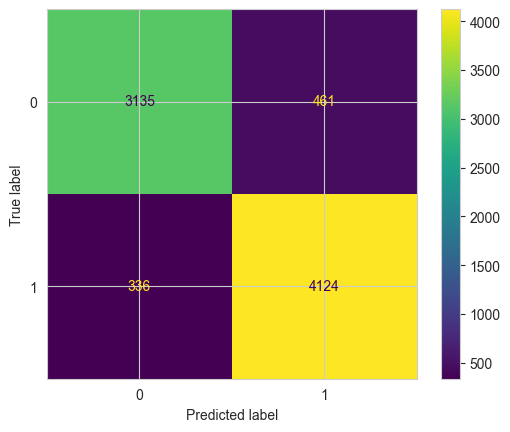

In [197]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


confusion_matrix = confusion_matrix(label_test,model_4_preds)

disp = ConfusionMatrixDisplay(confusion_matrix)

disp.plot()

plt.show()

In [204]:
confusion_matrix

array([[3312,  284],
       [ 382, 4078]])

In [185]:
# Compare model 4 to baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline Accuracy: 92.81, New Accuracy: 90.80, Difference: -2.01
Baseline Precision (weighted): 0.93, New Precision (weighted): 0.91, Difference: -0.02
Baseline Recall (weighted): 0.93, New Recall (weighted): 0.91, Difference: -0.02
Baseline F1-Score (weighted): 0.93, New F1-Score (weighted): 0.91, Difference: -0.02


Even using the above approach (Bi direction LSTM), the validation accuracies are comparatively almost equal to the baseline model but still not as good as the baseline model

In [208]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 7.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 10.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 406.9/406.9 kB 7.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [209]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel


max_seq_length = 128

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize and pad the input sequences
def tokenize_and_pad(texts, tokenizer, max_seq_length):
    tokenized_texts = tokenizer(texts, truncation=True, padding='max_length', max_length=max_seq_length, return_tensors='tf')
    return {
        'input_ids': tokenized_texts['input_ids'],
        'attention_mask': tokenized_texts['attention_mask'],
        'token_type_ids': tokenized_texts['token_type_ids']
    }

# Example data
msg_train = ["Your training data goes here..."]  # Replace with your actual training data

# Tokenize and pad the training data
tokenized_train = tokenize_and_pad(msg_train, tokenizer, max_seq_length)

# Set random seed
tf.random.set_seed(42)

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

# Create the BERT-based model
input_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='attention_mask')
token_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='token_type_ids')

bert_output = bert_model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
pooled_output = bert_output.pooler_output

# Add Dense layers for final predictions
x = tf.keras.layers.Dense(64, activation="relu")(pooled_output)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Create the BERT-based model
model_bert = tf.keras.Model(inputs=[input_ids, attention_mask, token_type_ids], outputs=outputs, name="model_bert")

model_bert.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_bert.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model_bert"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 token_type_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                         

In [213]:
type(msg_test)

numpy.ndarray

In [214]:

msg_test_list = msg_test.tolist()


tokenized_test = tokenize_and_pad(msg_test_list, tokenizer, max_seq_length)


model_5_pred_probs = model_bert.predict(tokenized_test)


252/252 [==============================] - 663s 3s/step


In [220]:
np.max(model_5_pred_probs)

0.55817884

In [222]:
label_test

array([1, 1, 1, ..., 0, 1, 0])

In [223]:
model_5_pred_labels = (model_5_pred_probs > 0.5).astype(int)

In [224]:
accuracy_score(label_test, model_5_pred_labels)


0.44823733862959286

In [206]:
## Saving the Random forest model inorder to deploy it in streamlit

In [222]:
import sklearn.externals
import joblib

joblib.dump(model_1, 'rf_pipeline.pkl')

['rf_pipeline.pkl']

In [223]:
import sklearn.externals
import joblib

joblib.load('rf_pipeline.pkl')

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [226]:
pip install scikitlearn==0.18.1

ERROR: Could not find a version that satisfies the requirement scikitlearn==0.18.1 (from versions: none)
ERROR: No matching distribution found for scikitlearn==0.18.1
Note: you may need to restart the kernel to use updated packages.


In [237]:
pip install joblib==0.13.2

  Using cached joblib-0.13.2-py2.py3-none-any.whl (278 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.3.0 requires joblib>=1.1.1, but you have joblib 0.13.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [240]:
import joblib

joblib.dump(model_1, 'rf_pipeline.pkl',compress=0)

['rf_pipeline.joblib']

In [246]:
model_1

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])